In [11]:
import sys
import os

# Add the parent directory to the sys.path
sys.path.append(os.path.join(os.getcwd(), '..'))

In [ ]:
# gubenatorial
# senate


# correlation table on the bimodality measures

In [12]:
# bimodality & gamma and serve the brutons!@#$%^&*()_+ 
#(new york election, maybe use a plotting method to inspect individual points more easliy [seaborn?])
# code "problem" elections, maybe sort across and see if there are any patterns
# get a rule that culls elections and only plot problem elections
# 

In [13]:
import seaborn as sns
import numpy as np

from scipy.stats import kurtosis, skew, gaussian_kde
from scipy.signal import argrelextrema

from rcv_learning.rcv_distribution import *
from rcv_learning.rcv_dimensionality import *

In [14]:
import numpy as np
from scipy.stats import rankdata

def compute_ecdf(data):
    """Compute the empirical cumulative distribution function (ECDF) of data."""
    sorted_data = np.sort(data)
    n = len(data)
    return sorted_data, np.arange(1, n+1) / n

def dip_statistic(data):
    """Compute Hartigan's dip statistic for data."""
    data = np.sort(data)
    n = len(data)
    
    # Compute the empirical CDF
    x, ecdf = compute_ecdf(data)
    
    # Compute the greatest difference on the left and right side for each data point
    U = np.arange(1, n+1) / n
    D = U - np.arange(0, n) / n
    
    # Calculate the difference between the empirical distribution function and the 
    # unimodal distribution function that minimizes that maximum difference.
    low_dip = (ecdf - D).clip(min=0)
    up_dip = (U - ecdf).clip(min=0)
    both_dips = np.column_stack((low_dip, up_dip))
    
    # The dip statistic is the maximum difference over all data points
    dip = np.max(both_dips)
    
    return dip

/Users/es5891/Documents/GitHub/bugs-in-democracy/rcv_exploration/../rcv_learning/rcv_dimensionality.py:170: RuntimeWarning: divide by zero encountered in divide
  distance = 1 / np.sqrt(freq_upper_triangle)


Normalized distances: {'Guillermo A. Perez': 0.0, 'Mark D. Levine': 2.2725854272404162, 'Brad M. Hoylman': 2.945075526234712, 'Elizabeth R. Caputo': 3.7663465252933976, 'Ben Kallos': 3.869579920976035, 'Lindsey C. Boylan': 4.762033654994226, 'Kimberly R. Watkins': 6.0}


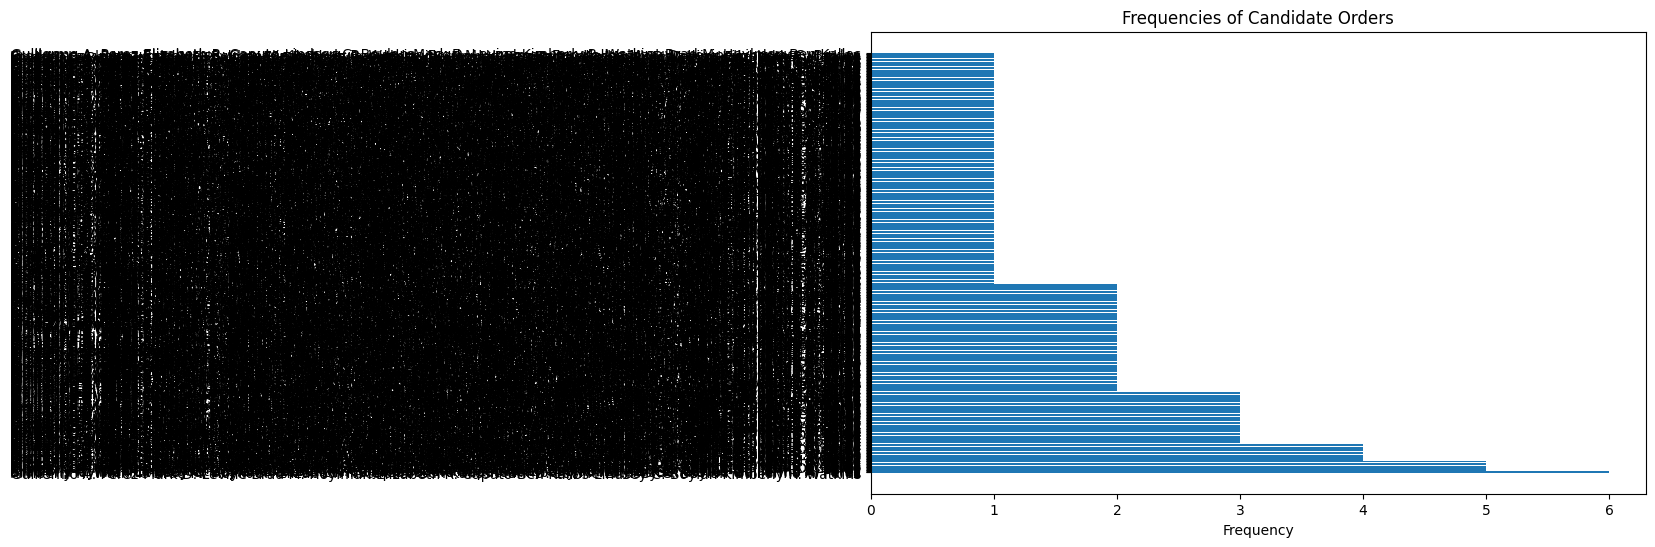

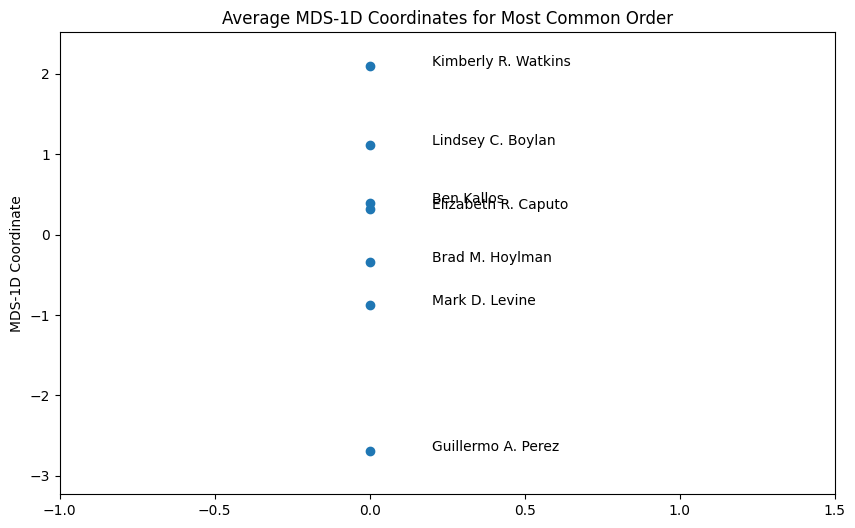

/Users/es5891/Documents/GitHub/bugs-in-democracy/rcv_exploration/../rcv_learning/rcv_dimensionality.py:170: RuntimeWarning: divide by zero encountered in divide
  distance = 1 / np.sqrt(freq_upper_triangle)


Consistency points: {5.184731208465591: 565, 2.272585427240415: 23641, 3.031357506926417: 2817, 2.945075526234711: 20414, 3.1042594911818604: 112, 3.2575020715863667: 2047, 3.5163480136614846: 585, 0.8084208918602185: 57, 3.4370503808312303: 1137, 2.9472962445521302: 1957, 2.4407079519889887: 5527, 4.912974944620788: 6216, 6.0: 3882, 2.242916754275643: 111, 3.290203449001535: 9234, 3.204439070430311: 867, 4.194781707641333: 5545, 2.526989932680695: 2617, 2.458294058531053: 72, 2.9326828065855084: 2231, 4.319052586682278: 58, 3.3304040558418095: 78, 2.5969212246648166: 1092, 2.562828622155437: 234, 3.695896322906348: 1273, 4.374330016886197: 693, 4.134055481836082: 185, 0.0: 6294, 3.6061221682839166: 134, 2.4838489423348418: 1964, 4.261257734556222: 109, 0.7867273271585129: 65, 2.6400622150106696: 362, 4.510208148808598: 429, 4.938743781167331: 52, 4.121738567275833: 53, 2.7531344973406444: 1779, 2.514253866209782: 75, 4.646086280731: 464, 3.0254028808900437: 283, 2.7298363696331016: 38

In [19]:
# Test the function with a custom CSV file
csv = "../rcv_elections_database/classic/NewYorkCity_06222021_DEMBoroughPresidentNewYork.csv"

# Perform the RCV analysis
test = perform_rcv_analysis(csv, n_runs=1000)
mds_1d_coordinates, mds_2d_coordinates, most_common_order, order_frequencies, candidate_names = test

# Print the normalized distances between candidates and plot the MDS analysis
print("Normalized distances:", get_distances_normalized(most_common_order, mds_1d_coordinates, candidate_names))
plot_rcv_analysis(mds_1d_coordinates, mds_2d_coordinates, most_common_order, order_frequencies, candidate_names)

# Get the consistency points for the bimodality analysis
points = get_consistency_points(csv)
print("Consistency points:", points)

# Create a list of data points
data_points = []
for key, value in points.items():
    data_points.extend([key] * value)

# Convert to numpy array
data_points = np.array(data_points)

# Calculate skewness and kurtosis
g = skew(data_points)
k = kurtosis(data_points)

# Calculate KDE without plotting
density = gaussian_kde(data_points)
x_vals = np.linspace(min(data_points), max(data_points), 1000)
y_vals = density(x_vals)

# Identify local maxima in the KDE
maxima_indices = argrelextrema(y_vals, np.greater)

# Get the x-values of the maxima
modes = x_vals[maxima_indices]

# Check if there are at least two modes
if len(modes) >= 2:
    mode1, mode2 = modes[:2]

    # Calculate the amplitudes of the two modes
    amp1 = density(mode1)[0]
    amp2 = density(mode2)[0]

    # Calculate the amplitude ratio with higher amplitude as denominator
    if amp1 > amp2:
        amplitude_ratio = amp2 / amp1
    else:
        amplitude_ratio = amp1 / amp2

    # Calculate x-axis distance between the two modes
    mode_distance = abs(mode2 - mode1)

else:
    mode1, mode2 = None, None
    amplitude_ratio = None
    mode_distance = None

# Split the data into two groups based on proximity to the modes
data_group1 = [point for point in data_points if abs(point - mode1) < abs(point - mode2)]
data_group2 = [point for point in data_points if abs(point - mode1) > abs(point - mode2)]

# Display mean and variance for each group
mu1, sigma1_sq = np.mean(data_group1), np.var(data_group1)
mu2, sigma2_sq = np.mean(data_group2), np.var(data_group2)

# Display Ashman's D statistic (D > 2)
ashmans_D = abs(mu1 - mu2) / np.sqrt((sigma1_sq + sigma2_sq) / 2)
print("Ashman's D statistic:", ashmans_D)

# Display Sarle's bimodality coefficient b (b > 5/9)
n = len(data_points)
sarle = (g**2 + 1) / (k + 3 * (n-1)**2 / ((n-2) * (n-3)))
print("Sarle's coefficient:", sarle)

# Display Hartigan's dip statistic ... (TODO - Permutation test)
hartigan_dip = dip_statistic(data_points)
print("Hartigan's Dip Statistic:", hartigan_dip)

# Display Amplitude Ratio
print("Amplitude Ratio:", amplitude_ratio)

# Display Mode Distance
print("Mode Distance:", mode_distance)


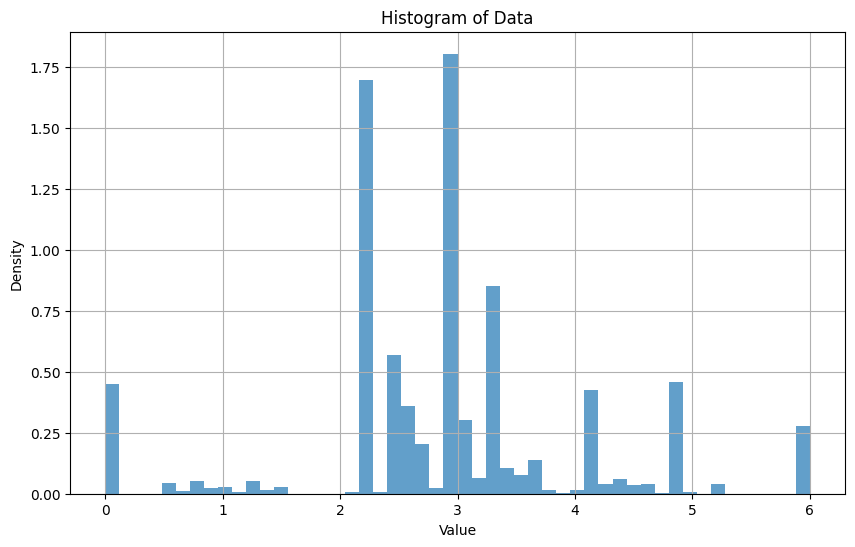

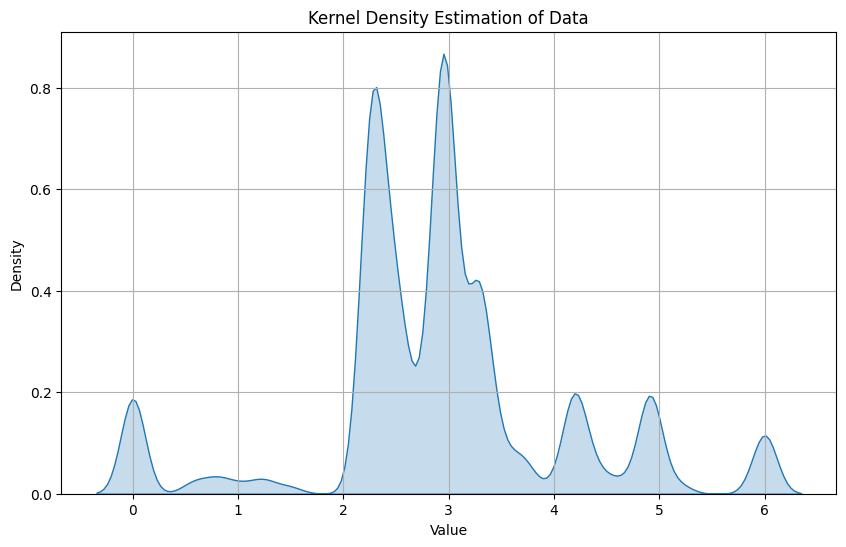

In [20]:
# Prepare data for histogram
data_list = [x for x, count in points.items() for _ in range(count)]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data_list, bins=50, density=True, alpha=0.7)
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Plot kernal density estimation
plt.figure(figsize=(10, 6))
sns.kdeplot(data_list, fill=True)
plt.title('Kernel Density Estimation of Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()